Valeurs manquantes après remplacement des zéros :
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Données après imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


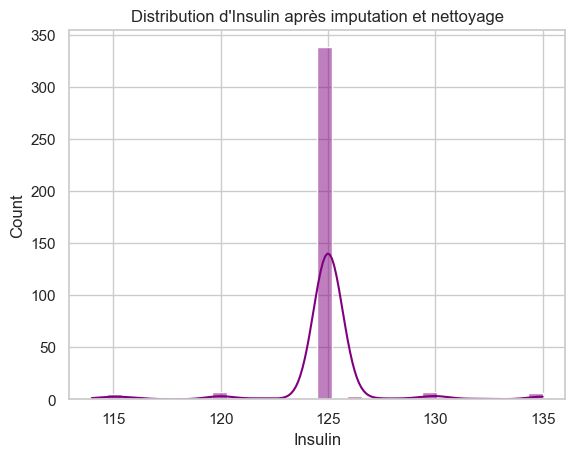


Fichier nettoyé sauvegardé sous 'diabetes_cleaned.csv'
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
5            5    116.0           74.0           29.0    125.0  25.6   
7           10    115.0           72.0           29.0    125.0  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
5                     0.201   30        0  
7                     0.134   29        0  


C:\Users\joeld\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\joeld\AppData\Local\Temp\ipykernel_10320\1583248297.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_outliers['Outcome'] = y


In [63]:
# 1. Import des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# 2. Chargement du dataset
df = pd.read_csv("diabetes.csv")

# 3. Remplacement des 0 incohérents par NaN
# Nous ne remplaçons que les colonnes où des 0 ne sont pas logiques (comme Glucose, BloodPressure, Insulin, etc.)
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace:
    df[col] = df[col].replace(0, np.nan)

# 4. Vérification du nombre de NaN
print("Valeurs manquantes après remplacement des zéros :")
print(df.isnull().sum())

# 5. Imputation des NaN par la médiane
# On impute avec la médiane pour éviter de fausser la distribution des données par une imputation par la moyenne.
imputer = SimpleImputer(strategy='median')
df[cols_to_replace] = imputer.fit_transform(df[cols_to_replace])

# 6. Vérification post-imputation
print("\nDonnées après imputation :")
print(df.isnull().sum())

# 7. Traitement des outliers (valeurs aberrantes)
# Utilisation de l'écart interquartile (IQR) pour identifier les outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identification des valeurs aberrantes
outliers_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Suppression des lignes avec des outliers
df_cleaned_no_outliers = df[~outliers_condition.any(axis=1)]

# 8. Visualisation après nettoyage (facultatif)
# Affichage de la distribution de la colonne 'Insulin' après nettoyage et imputation
sns.histplot(df_cleaned_no_outliers['Insulin'], kde=True, bins=30, color='purple')
plt.title("Distribution d'Insulin après imputation et nettoyage")
plt.show()

# 9. Normalisation des données (si vous utilisez k-NN, SVM, etc.)
# Normalisation de toutes les caractéristiques (sauf la cible)
X = df_cleaned_no_outliers.drop('Outcome', axis=1)
y = df_cleaned_no_outliers['Outcome']

# Standardisation (mettre toutes les variables à une échelle commune)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 10. Séparation des données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 11. Gestion du déséquilibre des classes (sous-échantillonnage ou sur-échantillonnage)
# Utilisation de la méthode SMOTE pour suréchantillonner la classe minoritaire (diabète)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 12. Sauvegarde du fichier nettoyé
# Sauvegarder le dataset nettoyé pour l'utilisation future
df_cleaned_no_outliers['Outcome'] = y
df_cleaned_no_outliers.to_csv("diabetes_cleaned_v2.csv", index=False)
print("\nFichier nettoyé sauvegardé sous 'diabetes_cleaned.csv'")

# Optionnel : Affichage du DataFrame nettoyé pour vérifier les changements
print(df_cleaned_no_outliers.head())
